### take active matrix, during stimulus, take eigenspectrum slowest modes (vals near 0), project activity onto those modes
- look for way to show network is trying to "sum" the inputs



### Notes on drift diffusion:
- random walk until you hit a bound at $\pm B$
- "self excitation and lateral inhibition"



### analysis ideas:
- show that it is integrating (something about slow eigenmodes)
- see how the network responds to inputs outside of training
    - longer timescale for output
    - different length stimulus
- calculate fixed points across partitions, even outside of current partition



### training ideas:
- overtrain a lot to get more stable solution
- train using many more coherences
- decide on whether to use input/recurrent noise
- try fewer neurons

# Import

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sisyphus2.backend import analysis, visualizations, simulation_tools
from sisyphus2.backend.networks import Model
from sisyphus2.tasks import task

In [99]:
rdm = task.rdm2(stim_noise = 0.02, coherences = np.linspace(.01, .2, 100), rec_noise = .01, N_rec = 5)

In [100]:
gen = rdm.generate_train_trials()

In [101]:
params = rdm.__dict__


In [5]:
params['weights_path'] = '../weights/rdm_10_rec.npz'

# Train

In [102]:
model = Model(params)
learning_rate = .001 
training_iters = 1000000
weights_path = '../weights/rdm_david.npz'
sess = tf.Session()
model.train(sess, gen, learning_rate = learning_rate, 
            training_iters = training_iters, weights_path = weights_path)
sess.close()

Iter 640, Minibatch Loss= 0.123092
Iter 1280, Minibatch Loss= 0.225227
Iter 1920, Minibatch Loss= 0.170061
Iter 2560, Minibatch Loss= 0.295512
Iter 3200, Minibatch Loss= 0.128132
Iter 3840, Minibatch Loss= 0.225474
Iter 4480, Minibatch Loss= 0.204179
Iter 5120, Minibatch Loss= 0.110006
Iter 5760, Minibatch Loss= 0.159528
Iter 6400, Minibatch Loss= 0.086863
Iter 7040, Minibatch Loss= 0.106602
Iter 7680, Minibatch Loss= 0.115620
Iter 8320, Minibatch Loss= 0.169333
Iter 8960, Minibatch Loss= 0.175867
Iter 9600, Minibatch Loss= 0.174608
Iter 10240, Minibatch Loss= 0.159683
Iter 10880, Minibatch Loss= 0.120714
Iter 11520, Minibatch Loss= 0.175233
Iter 12160, Minibatch Loss= 0.116760
Iter 12800, Minibatch Loss= 0.100706
Iter 13440, Minibatch Loss= 0.113684
Iter 14080, Minibatch Loss= 0.160944
Iter 14720, Minibatch Loss= 0.185052
Iter 15360, Minibatch Loss= 0.179343
Iter 16000, Minibatch Loss= 0.139705
Iter 16640, Minibatch Loss= 0.091917
Iter 17280, Minibatch Loss= 0.146039
Iter 17920, Minib

In [116]:
weights_path = '../weights/rdm_4_rec.npz'

In [51]:
weights_path = '../weights/rdm_10_rec.npz'

# Generate Trials

In [5]:
weights_path = '../weights/rdm_david.npz'

In [111]:
sim = simulation_tools.Simulator(params, weights_path=weights_path)
dat = gen.next()
trial = dat[0][0,:,:]
result = dat[1][0,:,:]

In [112]:
trial = np.vstack((trial, np.zeros((1000,2))))

In [113]:
output,states = sim.run_trial(trial)

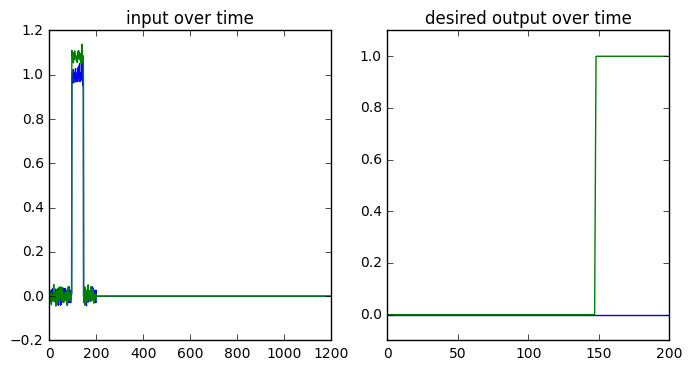

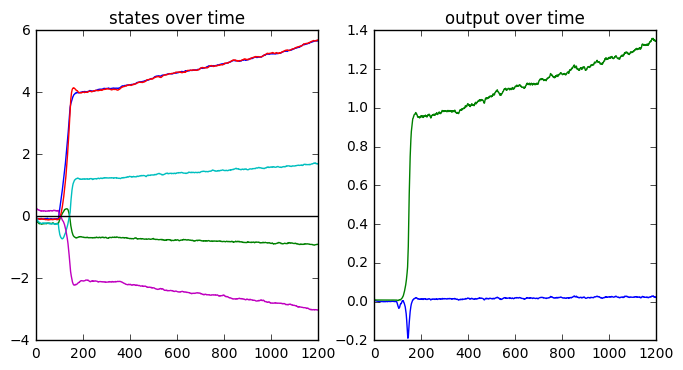

In [114]:

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(trial)
plt.title("input over time")

plt.subplot(1,2,2)
plt.plot(result)
plt.ylim(-0.1, 1.1)
plt.title("desired output over time")

plt.show()

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(states[:,0,:])
plt.axhline(y=0, color='k')
plt.title("states over time")

plt.subplot(1,2,2)
plt.plot(output[:,0,:])
plt.title("output over time")
plt.show()

In [115]:
analysis.hahnloser_fixed_point(sim, trial)

[-0.02949804 -0.0288206 ]
[ 0.02535493  0.00294741]
[-0.00492455 -0.00231478]
[-0.02675852 -0.02798578]
[ 0.02445758  0.02371738]
[-0.00385409  0.01526446]
[-0.00366084 -0.00301634]
[-0.0076656  0.0048758]
[-0.01608573 -0.03842994]
[ 0.0284635   0.00500377]
[-0.01749423 -0.01148566]
[ 0.02437408 -0.0054573 ]
[-0.00223899  0.00604231]
[ 0.01027251 -0.02010699]
[ 0.01167137 -0.02244764]
[ 0.03459897  0.00628054]
[-0.00357676 -0.01792369]
[ 0.01751166  0.04048059]
[ 0.0051089   0.05237078]
[ 0.01701544 -0.00269754]
[-0.00118295  0.01530324]
[ 0.01263274 -0.02584202]
[-0.02124402  0.01695884]
[-0.01538939 -0.00735402]
[-0.0234046   0.00027253]
[  5.07754984e-05  -2.00131811e-03]
[ 0.03219482 -0.01586655]
[ 0.00354896 -0.04471631]
[ 0.00313699  0.00040689]
[ 0.00713898 -0.0199529 ]
[ 0.01411478  0.01571711]
[ 0.02026144  0.0295548 ]
[-0.0010622  -0.03718846]
[ 0.00502761 -0.02675275]
[-0.0005407   0.01053064]
[-0.00791276  0.02166989]
[ 0.03371886 -0.01713234]
[ 0.00754998  0.0040711 ]
[-0.

[array([-0.09523034, -0.25528365, -0.1195675 , -0.25397059,  0.17645786]),
 array([-0.07931355, -0.22209167, -0.08140795, -0.22857588,  0.18815419]),
 array([-0.08184191, -0.23843424, -0.09698596, -0.23432071,  0.18413134]),
 array([-0.0948187 , -0.2537472 , -0.11799774, -0.25320904,  0.17689295]),
 array([-0.0687195 , -0.21920068, -0.07251577, -0.21464105,  0.19218408]),
 array([-0.07288469, -0.23505099, -0.08866051, -0.22239376,  0.18772221]),
 array([-0.08220604, -0.23790076, -0.09674758, -0.23470187,  0.18411659]),
 array([-0.07816184, -0.23867698, -0.09496905, -0.22967287,  0.18528734]),
 array([-0.10019807, -0.24997064, -0.11800447, -0.25947421,  0.17587232]),
 array([-0.07828099, -0.22016936, -0.07913096, -0.22696416,  0.1888678 ]),
 array([-0.08645348, -0.2463453 , -0.10657566, -0.24141471,  0.18107613]),
 array([-0.08359364, -0.22394924, -0.08559327, -0.23431225,  0.18639123]),
 array([-0.07759479, -0.23571207, -0.09207733, -0.2284927 ,  0.18605261]),
 array([-0.09099073, -0.2

In [11]:
sim.W_rec

array([[ 0.92765075,  0.16315955, -0.74363202, -1.08248019],
       [-0.23615766, -0.65814942,  1.15642083, -1.00409651],
       [-0.96886259,  0.3102026 ,  0.3764306 , -1.47660911],
       [-0.85208613, -0.1388205 ,  0.00819291,  0.62426376]], dtype=float32)

In [65]:
sim.W_out

array([[ 0.14760181, -1.80095565, -1.66495442]], dtype=float32)

# Daniel's old tests (only noise input, etc)

In [118]:
def plot_response_test(sim, x_test):
    
    n_trials = x_test.shape[0]
    choice = np.zeros(n_trials)
    resp = np.zeros(n_trials)

    for ii in range(n_trials):
        o,s = sim.run_trial(x_test[ii,:,:])
        resp[ii] = o[-1,0,0]
        choice[ii] = np.sign(resp[ii] - .4)
        
    mean_up = np.mean(x_test[choice==1,:,:],axis=0)
    mean_down = np.mean(x_test[choice==-1,:,:],axis=0)
    
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.plot(mean_up)
    plt.title('Average Up')
    plt.subplot(1,2,2)
    plt.plot(mean_down)
    plt.title('Average Down')
    
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.bar([0,1],[np.mean(choice==1),np.mean(choice==-1)])
    plt.xticks([.35,1.45],['Up','Down'])
    plt.xlabel('Percent Up')
    plt.subplot(1,2,2)
    plt.hist(resp,20)
    plt.title('Response Histogram')
    plt.show()
    
    return mean_up,mean_down,choice,resp

def coherence_test(sim,cohs = [.2,.1,.05,.04,.02],n_hidden=10,sigma_in = 0):
    
    n_cohs = len(cohs)
    a = np.zeros([200,1])
    a[40:140] = 1
    o = np.zeros([200,n_cohs])
    s = np.zeros([200,n_hidden,n_cohs])
    ev = np.zeros([200,n_cohs])
    for ii,coh in enumerate(cohs): 
        inp = coh*a + sigma_in*np.random.randn(len(a),1)
        o_temp,s_temp = sim.run_trial(inp,t_connectivity=False)
        o[:,ii] = o_temp[:,0,:].flatten()
        s[:,:,ii] = s_temp[:,0,:]
        ev[:,ii] = np.cumsum(coh*a)

    
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.plot(o)
    plt.title('output')
    
    plt.subplot(1,2,2)
    plt.plot(ev)
    plt.title('sum of evidence')
    
    plt.show()
    
    return o,s

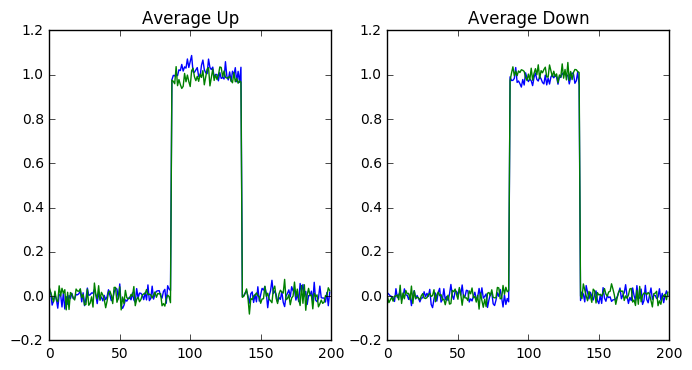

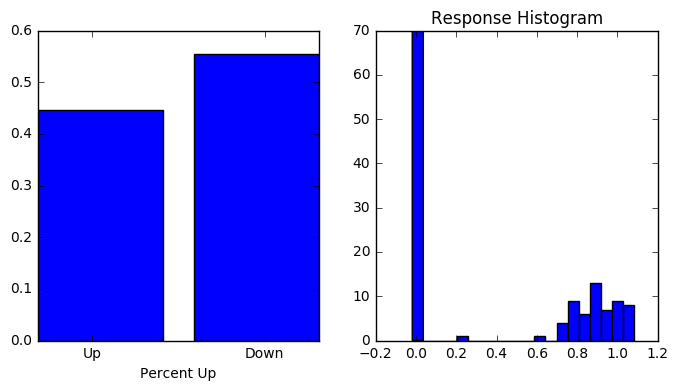

In [119]:
rdm2 = task.rdm2(stim_noise = 0.2, coherences = [0], rec_noise = .01, N_rec = 10)
gen2 = rdm2.generate_train_trials()


a = plot_response_test(sim, gen2.next()[0])
#b = coherence_test(sim, cohs = np.linspace(-.2, .2, 20), n_hidden = 10)

# Distance to fixed point

In [80]:
def distance_to_fixed(sim, trial):
    outputs, states = sim.run_trial(trial)

    input_mat = np.matmul(np.absolute(sim.W_in), np.transpose(trial))

    #set identity matrix of proper size
    identity = np.diag(np.ones(sim.N_rec))

    dists = []
    for i, s in enumerate(states):
        # define active weight matrix
        Wp = np.copy(sim.W_rec)
        for index in range(sim.N_rec):
            if s[0,index] < 0:
                Wp[:, index] = 0
        Wp = Wp - identity
        
        #find fixed point at this time step
        # (even if it is outside the current partition)
        fixed_point = -1 * np.matmul(np.linalg.inv(Wp), sim.b_rec + input_mat[:,i])
        
        #calculate distance to fixed point
        d = np.linalg.norm(fixed_point - s)
        dists.append(d)
                       
    # plot results

    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(8,8))
    ax1.plot(dists)
    ax1.set_title('Distance to Fixed Point')
    ax4.plot(np.transpose(input_mat))
    ax3.plot(states[:,0,:])
    ax3.axhline(y=0, color='k')
    plt.show()

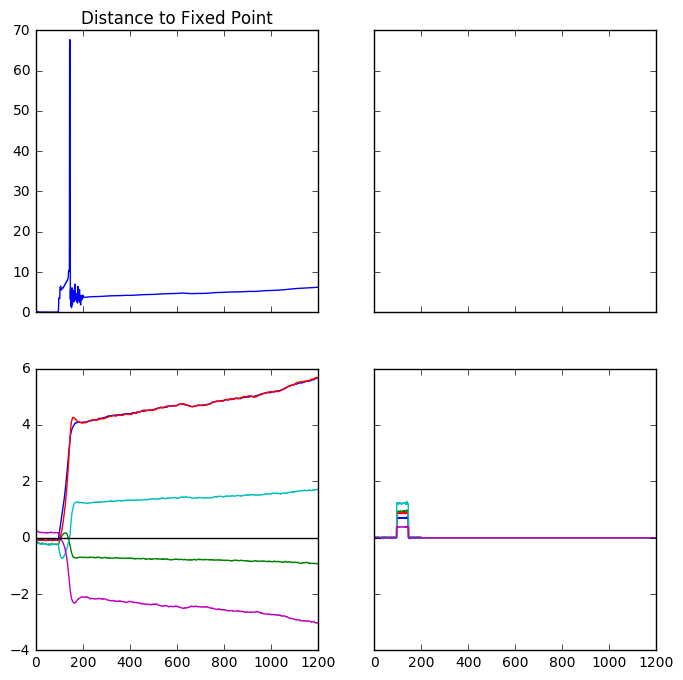

In [120]:
distance_to_fixed(sim, trial)

# Distance to Final Fixed Point

In [94]:
# for rdm_10_rec
fp1 = [ 0.70322314, -0.21220454,  0.42586755,  0.45786433,  0.86620442,
        -0.07819017, -0.18917653, -0.14375263,  0.57091555, -0.9131199 ]
fp2 = [-0.21374657,  0.4618243 , -0.46038991,  0.43066988, -0.42712579,
        -0.43483795,  0.30266692,  0.58161119, -0.16717428, -0.01333921]
fp3 = [-0.13135733, -0.09012359,  0.04480331, -0.11539256, -0.04676911,
         0.37516717, -0.04543317, -0.0355923 , -0.07917503,  0.08330037]

In [95]:
def fp_dists(sim, trial):
    outputs, states = sim.run_trial(trial)

    input_mat = np.matmul(np.absolute(sim.W_in), np.transpose(trial))

    #set identity matrix of proper size
    identity = np.diag(np.ones(sim.N_rec))

    dists1 = []
    dists2 = []
    dists3 = []
    for i, s in enumerate(states):
        # define active weight matrix
        Wp = np.copy(sim.W_rec)
        for index in range(sim.N_rec):
            if s[0,index] < 0:
                Wp[:, index] = 0
        Wp = Wp - identity
        
        #find fixed point at this time step
        # (even if it is outside the current partition)
        fixed_point = -1 * np.matmul(np.linalg.inv(Wp), sim.b_rec + input_mat[:,i])
        
        #calculate distance to fixed point
        d = np.linalg.norm(fp1 - s)
        dists1.append(d)
        
        d = np.linalg.norm(fp2 - s)
        dists2.append(d)
        
        d = np.linalg.norm(fp3 - s)
        dists3.append(d)
                       
    # plot results

    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(8,8))
    ax1.plot(dists1)
    ax1.set_title('Distance to Fixed Point 1')
    ax2.plot(dists2)
    ax2.set_title('Distance to Fixed Point 2')
    ax4.plot(dists3)
    ax3.plot(states[:,0,:])
    ax3.axhline(y=0, color='k')
    plt.show()

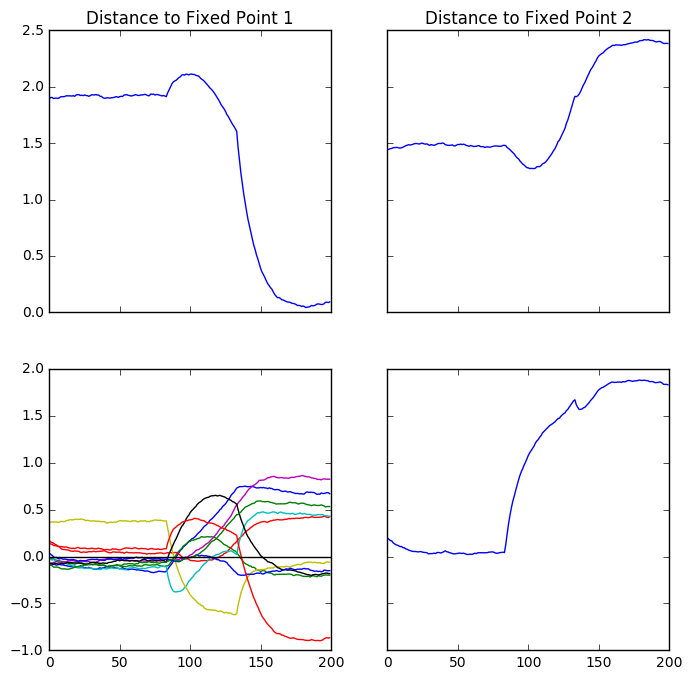

In [96]:
fp_dists(sim, trial)

# Plot eigenvalues

In [18]:
def plot_eigvals(sim, trial):
    outputs, states = sim.run_trial(trial)

    input_mat = np.matmul(np.absolute(sim.W_in), np.transpose(trial))

    #set identity matrix of proper size
    identity = np.diag(np.ones(sim.N_rec))

    vals = []
    for i, s in enumerate(states):
        # define active weight matrix
        Wp = np.copy(sim.W_rec)
        for index in range(sim.N_rec):
            if s[0,index] < 0:
                Wp[:, index] = 0
        Wp = Wp - identity
        
        #find eigenvals (real part) at this time step
        l, v = np.linalg.eig(Wp)
        vals.append(np.real(l))
                       
    # plot results

    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(8,8))
    ax1.plot(vals)
    ax1.set_title('Eigenvalues')
    ax4.plot(np.transpose(input_mat))
    ax3.plot(states[:,0,:])
    ax3.axhline(y=0, color='k')
    plt.show()

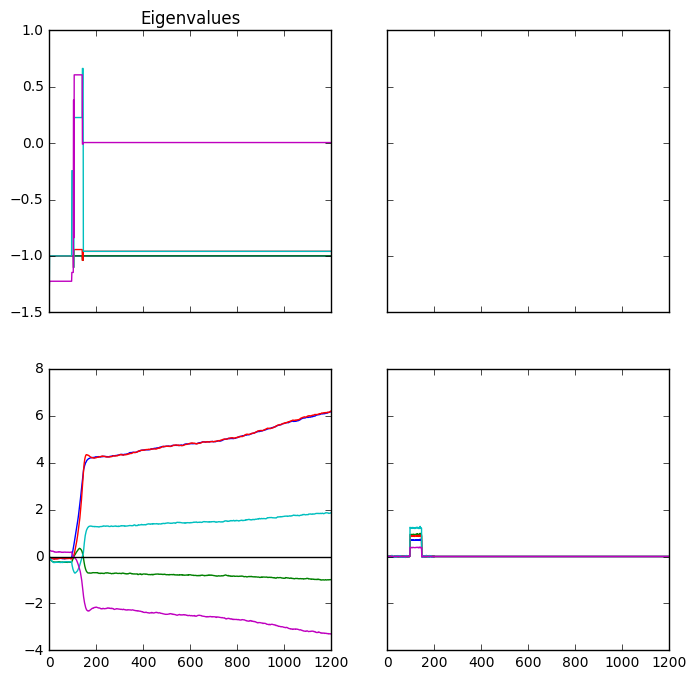

In [121]:
plot_eigvals(sim, trial)

# Project onto all eigenmodes

In [38]:
def project_to_eigenvecs(sim, trial):
    outputs, states = sim.run_trial(trial)

    input_mat = np.matmul(np.absolute(sim.W_in), np.transpose(trial))

    #set identity matrix of proper size
    identity = np.diag(np.ones(sim.N_rec))
    
    proj = []
    for i, s in enumerate(states):
        # define active weight matrix
        Wp = np.copy(sim.W_rec)
        for index in range(sim.N_rec):
            if s[0,index] < 0:
                Wp[:, index] = 0
        Wp = Wp - identity
           
        # project onto eigenvals
        vals, vecs = np.linalg.eig(Wp)
        proj_s = np.matmul(vecs, np.transpose(s))
        
        proj.append(np.transpose(proj_s))
       
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(8,8))
    ax1.plot(np.array(proj)[:,0,:])
    ax1.set_title('Eigenvalue projection')
    ax4.plot(np.transpose(input_mat))
    ax3.plot(states[:,0,:])
    ax3.axhline(y=0, color='k')
    plt.show()

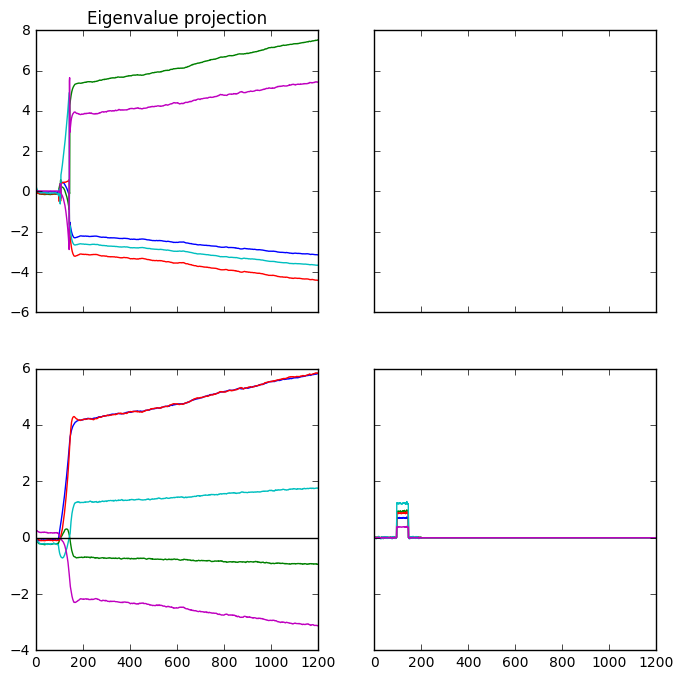

In [122]:
project_to_eigenvecs(sim, trial)

# Slow modes?

In [111]:
def slow_modes_analysis(sim, trial):
    outputs, states = sim.run_trial(trial)

    input_mat = np.matmul(np.absolute(sim.W_in), np.transpose(trial))

    #set identity matrix of proper size
    identity = np.diag(np.ones(sim.N_rec))
    

    proj = []
    for i, s in enumerate(states):
        # define active weight matrix
        Wp = np.copy(sim.W_rec)
        for index in range(sim.N_rec):
            if s[0,index] < 0:
                Wp[:, index] = 0
        Wp = Wp - identity
                
        #find slowest eigenmode
        vals, vecs = np.linalg.eig(Wp)
        slow_idx = np.argmin(np.real(vals))
        
        #if i == 1:
         #   print vals
         #   print vecs
        
        slow_val = vals[slow_idx]
        slow_vec = vecs[:,slow_idx]
        
        #project onto the slow mode
        projected_state = np.dot(s, slow_vec)/np.linalg.norm(slow_vec)
        proj.append(projected_state)
        
        
        
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(8,8))
    ax1.plot(proj)
    ax1.set_title('Slow Mode')
    ax4.plot(np.transpose(input_mat))
    ax3.plot(states[:,0,:])
    ax3.axhline(y=0, color='k')
    plt.show()
    

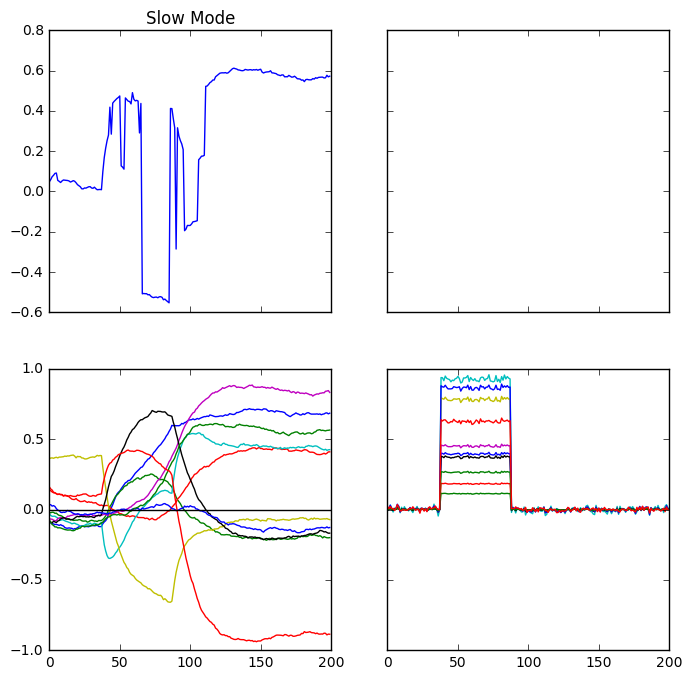

In [112]:
slow_modes_analysis(sim, trial)

In [36]:
sim.W_rec

array([[-0.        ,  0.48333243, -0.27838606],
       [ 1.15871501, -0.        ,  0.89962065],
       [-2.52069807,  1.13063204,  0.        ]], dtype=float32)

In [46]:
W = sim.W_rec - np.diag(np.ones(3))

In [77]:
np.linalg.eig(W / sim.tau)

(array([-0.02762825+0.j        , -0.00118588+0.00227491j,
        -0.00118588-0.00227491j]),
 array([[ 0.27921188+0.j        ,  0.21182608-0.19071858j,
          0.21182608+0.19071858j],
        [-0.57571546+0.j        ,  0.73197567+0.j        ,  0.73197567-0.j        ],
        [ 0.76850012+0.j        ,  0.44432776+0.43074424j,
          0.44432776-0.43074424j]]))

In [49]:
-1 * np.matmul(np.linalg.inv(W), sim.b_rec)

array([ 0.15813331,  0.26286239,  0.4949867 ])